# 線性迴歸(1)
數據分析、人工智慧、機器學習

概念都是一致的，其實就是要做一件事，讓電腦將一個函數學起來

例如今天要做出可以預測溫度的函式
那就將函式f(x)=y
x=日期
y=相對應的溫度

另外如果今天要將一個人的資料輸入

需要將特徵轉成數字輸入x

如消費次數、年齡、性別...等

重點在問問題的方式

ex：預設大樂特特別號
f(期數x)=大樂透x期的特別號

但過去的特別好可能不會包含未來特別好的線索

所以要換問法，顯輸入前五期的特別號，希望未來可以猜到某個數字
這樣比較有根據

數據分析步驟

1.想解決的問題化成函數

2.以「歷史資料」找出這個函數
例如機器學習、神經網路、回歸分析...

3.準備要分析的資料

# 線性迴歸(2)

讓電腦用線性迴歸學函數

可用套件
機器學習：
scikit-learn

# 模擬線性迴歸

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 準備模擬的資料

做一條直線
例如：
                f(x)=1.2x + 0.8

先準備50個點

In [3]:
x = np.linspace(0,5,50)

In [4]:
x

array([ 0.        ,  0.10204082,  0.20408163,  0.30612245,  0.40816327,
        0.51020408,  0.6122449 ,  0.71428571,  0.81632653,  0.91836735,
        1.02040816,  1.12244898,  1.2244898 ,  1.32653061,  1.42857143,
        1.53061224,  1.63265306,  1.73469388,  1.83673469,  1.93877551,
        2.04081633,  2.14285714,  2.24489796,  2.34693878,  2.44897959,
        2.55102041,  2.65306122,  2.75510204,  2.85714286,  2.95918367,
        3.06122449,  3.16326531,  3.26530612,  3.36734694,  3.46938776,
        3.57142857,  3.67346939,  3.7755102 ,  3.87755102,  3.97959184,
        4.08163265,  4.18367347,  4.28571429,  4.3877551 ,  4.48979592,
        4.59183673,  4.69387755,  4.79591837,  4.89795918,  5.        ])

In [5]:
y = 1.2*x + 0.8

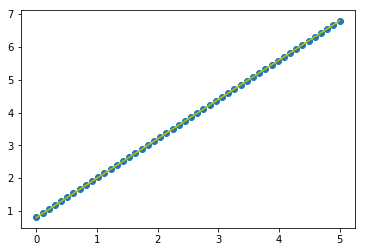

In [11]:
plt.scatter(x,y)
plt.plot(x,y,'y')

加入誤差項(noise)
大概的想法就是，我們真實世界的數據很少有上圖這麼漂亮的圖

In [12]:
y = 1.2*x + 0.8 +0.6*np.random.randn(50)

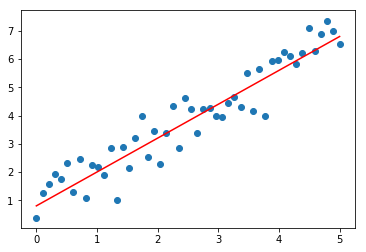

In [13]:
plt.scatter(x,y)
plt.plot(x,1.2*x + 0.8,'r')

# 直接利用線性迴歸做出紅色的線

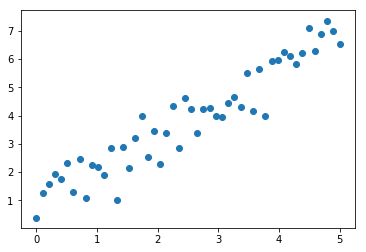

In [15]:
plt.scatter(x,y)

注意，本來的X是
                        [x1,x2,x3,x4.........x50]
                        
   但現在要的是
                        [[x1],[x2],[x3],[x4],[x5]........[x50]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regr = LinearRegression()

regr 是先開起一個回歸機

接著要重整X

In [20]:
X = x.reshape(50,1)

In [21]:
X

array([[ 0.        ],
       [ 0.10204082],
       [ 0.20408163],
       [ 0.30612245],
       [ 0.40816327],
       [ 0.51020408],
       [ 0.6122449 ],
       [ 0.71428571],
       [ 0.81632653],
       [ 0.91836735],
       [ 1.02040816],
       [ 1.12244898],
       [ 1.2244898 ],
       [ 1.32653061],
       [ 1.42857143],
       [ 1.53061224],
       [ 1.63265306],
       [ 1.73469388],
       [ 1.83673469],
       [ 1.93877551],
       [ 2.04081633],
       [ 2.14285714],
       [ 2.24489796],
       [ 2.34693878],
       [ 2.44897959],
       [ 2.55102041],
       [ 2.65306122],
       [ 2.75510204],
       [ 2.85714286],
       [ 2.95918367],
       [ 3.06122449],
       [ 3.16326531],
       [ 3.26530612],
       [ 3.36734694],
       [ 3.46938776],
       [ 3.57142857],
       [ 3.67346939],
       [ 3.7755102 ],
       [ 3.87755102],
       [ 3.97959184],
       [ 4.08163265],
       [ 4.18367347],
       [ 4.28571429],
       [ 4.3877551 ],
       [ 4.48979592],
       [ 4

In [22]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

開始預測的方法，機器的變數名稱.predict(輸入資料)

In [24]:
Y = regr.predict(X)

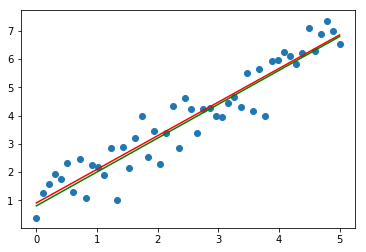

In [27]:
plt.scatter(x,y)
plt.plot(x,Y,'r')
plt.plot(x,1.2*x + 0.8,'g')

# 過度擬合 Overfitting

In [28]:
from ipywidgets import interact

互動函數  ipywidgets

In [40]:
X = np.linspace(0,5,1000)
def my_fit(n):
    Y = 4*np.sin(n*X) + 4
    plt.scatter(x,y)
    plt.plot(X,Y,'r')
    plt.show()

上列 np前乘4，是震幅，後面的加4是中心點
scatter-->真實世界答案
plot-->畫出sin

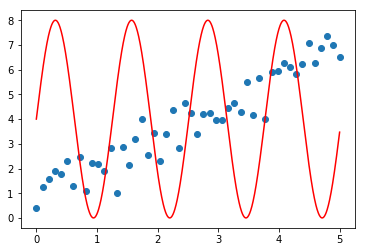

In [41]:
my_fit(5)

In [42]:
interact(my_fit,n=(1,500))

A Jupyter Widget

<function __main__.my_fit>

# 訓練資料以及測試

預測資料在真實世界中還沒發生，要怎麼知道預測的資料對不對？

In [46]:
x = np.linspace(0,5,100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)

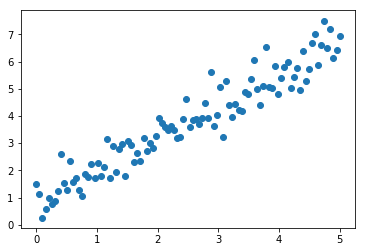

In [47]:
plt.scatter(x,y)

訓練時不用所有的資料，例如所以先隱藏20個點，而做好後再丟入此20個點，稱為測試點，如果準，表示沒有overfitting

In [49]:
from sklearn.model_selection import train_test_split

把原本的x,y中的80%給training data,20％給testing data

分割的方法
輸入的訓練資料,輸入的測試資料,輸出的訓練資料,輸出的測試資料 = train_test_split(x,y,test_size＝分割的比例,random_state=隨便給一串數字)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=87)

In [53]:
len(x_train)

80

In [54]:
len(x_test)

20

In [55]:
x_train = x_train.reshape(80,1)

In [56]:
x_train

array([[ 3.38383838],
       [ 2.72727273],
       [ 1.86868687],
       [ 3.83838384],
       [ 1.41414141],
       [ 0.05050505],
       [ 4.19191919],
       [ 4.54545455],
       [ 2.82828283],
       [ 0.1010101 ],
       [ 0.60606061],
       [ 4.94949495],
       [ 1.36363636],
       [ 0.25252525],
       [ 3.58585859],
       [ 0.85858586],
       [ 1.21212121],
       [ 3.33333333],
       [ 2.62626263],
       [ 3.43434343],
       [ 3.48484848],
       [ 2.77777778],
       [ 3.68686869],
       [ 0.2020202 ],
       [ 4.74747475],
       [ 4.34343434],
       [ 0.65656566],
       [ 1.71717172],
       [ 1.11111111],
       [ 1.51515152],
       [ 4.7979798 ],
       [ 2.17171717],
       [ 2.47474747],
       [ 1.91919192],
       [ 0.90909091],
       [ 2.52525253],
       [ 3.18181818],
       [ 1.06060606],
       [ 2.27272727],
       [ 4.6969697 ],
       [ 2.42424242],
       [ 2.67676768],
       [ 4.14141414],
       [ 3.23232323],
       [ 1.56565657],
       [ 1

In [59]:
x_test.shape = (20,1)

In [60]:
x_test

array([[ 0.80808081],
       [ 4.09090909],
       [ 4.29292929],
       [ 1.61616162],
       [ 1.96969697],
       [ 1.26262626],
       [ 1.31313131],
       [ 1.46464646],
       [ 3.28282828],
       [ 0.35353535],
       [ 4.24242424],
       [ 5.        ],
       [ 2.92929293],
       [ 3.53535354],
       [ 4.64646465],
       [ 3.73737374],
       [ 0.15151515],
       [ 0.        ],
       [ 2.22222222],
       [ 1.66666667]])

用訓練資料來fit函數
    用sklearn.linear_model

In [61]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

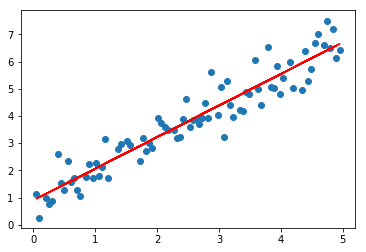

In [62]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regr.predict(x_train),'r')

用測試資料看看準不準

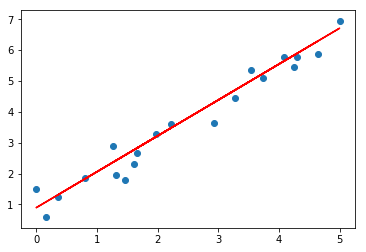

In [63]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regr.predict(x_test),'r')

# 真實世界數據
scikit-learn 內建一些真實數據，可以測試，稱做"Toy Datasets"，有哪些可以參考

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##  讀入bostom房價數據

In [66]:
from sklearn.datasets import load_boston

In [67]:
boston = load_boston()

# 看資料有什麼
feature
可以用 feature_name 看數據中有的features。 可發現boston 裡有13個features

In [68]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [69]:
X = boston.data
Y = boston.target

In [72]:
len(X)

506

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                test_size=0.3,
                                                random_state=87)

In [74]:
regr = LinearRegression()

In [75]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
y_predict = regr.predict(x_test)

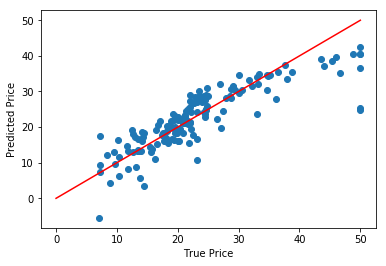

In [78]:
plt.scatter(y_test,y_predict)
plt.plot([0,50],[0,50],'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.plot([0,50],[0,50],'r') 是先畫基準線

## 解釋數據內容
可用 print(boston.DESCR)

In [79]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# 畫出上述13個features 與房價的關係

[小技巧]善用enumerate

In [80]:
L = ['a','b','c']

In [81]:
for i in L:
    print(i)

a
b
c


In [83]:
for i in range(3):
    print(i+1,L[i])

1 a
2 b
3 c


In [86]:
list(enumerate(L))


[(0, 'a'), (1, 'b'), (2, 'c')]

In [88]:
for i in enumerate(L):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [90]:
for i,s in enumerate(L):
    print(i+1,s)

1 a
2 b
3 c


[小技巧]要畫多個圖

In [91]:
x = np.linspace(-10,10,200)

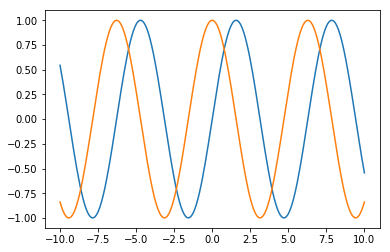

In [93]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

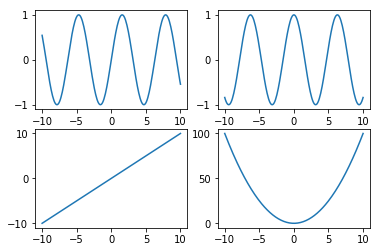

In [95]:
plt.subplot(2,2,1)
plt.plot(x,np.sin(x))

plt.subplot(2,2,2)
plt.plot(x,np.cos(x))

plt.subplot(2,2,3)
plt.plot(x,x)

plt.subplot(2,2,4)
plt.plot(x,x**2)

畫出13個feature

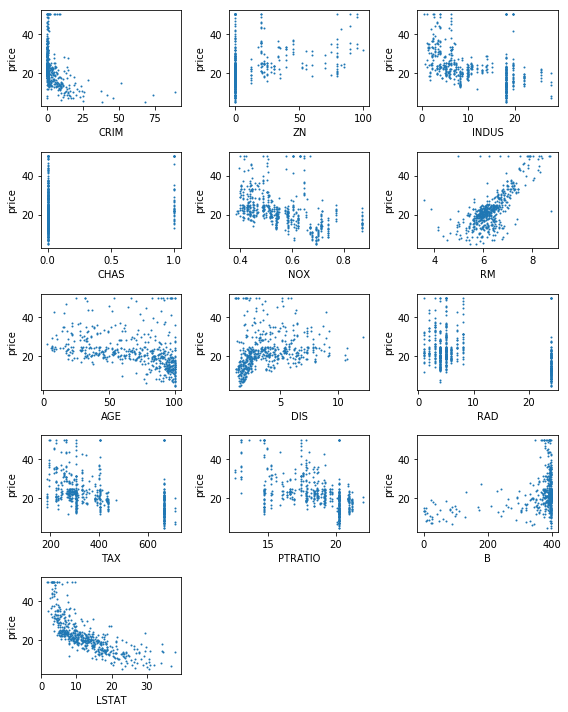

In [96]:
plt.figure(figsize=(8,10))
for i , feature in enumerate(boston.feature_names):
    plt.subplot(5,3,i+1)
    plt.scatter(X[:,i],Y,s=1)
    plt.ylabel("price")
    plt.xlabel(feature)
    plt.tight_layout()

第四行意思(plt.scatter(X[:,i],Y,s=1)

1. 因為X是一個二維array 所以這個意思是從每個index取出Column i 的值組成一個新的一維array
2. S 是plt.scatter 裡面的一個變數, 意思是這張圖的"點點"大小, 大小是根據 point^2 來畫

In [97]:
北七=[9,4,8,7]
i北七 = []
for i in enumerate(北七):
    i北七.append(i)

In [98]:
i北七

[(0, 9), (1, 4), (2, 8), (3, 7)]